<a href="https://colab.research.google.com/github/cheungngo/computational_physics/blob/main/03_02_02_nonlinear_oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear Oscillator

we have a mass $ m $ attached to a spring that exerts a restoring force $ F_k(x) $, and a hand that exerts a time-dependent external force $ F_{\text{ext}}(x, t) $ on the mass. The motion is constrained to one dimension.

### Equation of Motion

The equation of motion for this system can be described by Newton's second law:

$ m \frac{d^2 x}{dt^2} = -F_k(x) + F_{\text{ext}}(x, t) $

Here, $ x $ is the displacement of the mass from its equilibrium position, and $ \frac{d^2 x}{dt^2} $ is the acceleration of the mass.

### Non-Linear Restoring Force

The non-linear restoring force $ F_k(x) $ can be described by a power series expansion around the equilibrium position. A common form is:

$ F_k(x) = -kx - \alpha x^3 $

where $ k $ is the linear spring constant, and $ \alpha $ is a constant that determines the strength of the non-linear term.

### External Force

The external force $ F_{\text{ext}}(x, t) $ can be any function of position and time. It might represent a periodic driving force, a random noise, or any other influence on the system.

### Solving the Equation

Solving the equation of motion for a non-linear oscillator can be complex, especially if the external force is also a complex function of time. Analytical solutions may not be possible, and numerical methods such as the Runge-Kutta method might be required to solve the differential equation.

### Behavior of the System

The behavior of a non-linear oscillator can be quite rich and may include phenomena such as:

- **Bifurcations:** As parameters are varied, the system can undergo sudden changes in behavior.
- **Chaos:** For certain parameter values, the system may exhibit chaotic motion, where small changes in initial conditions lead to vastly different trajectories.
- **Harmonics and Subharmonics:** The response of the system may include frequencies that are multiples or fractions of the driving frequency, if there is a periodic external force.

### Conclusion

The study of non-linear oscillators is a fascinating field with applications in various areas of physics, engineering, and even biology. The complexity of the behavior can lead to rich dynamics and has been the subject of extensive research. Experimentation with different forms of the restoring force and external force can lead to a wide variety of interesting phenomena.

## The two different potential energy models

1. **Model 1**: $ V(x) \approx \frac{1}{2} kx^2 \left(1 - \frac{2}{3} \alpha x\right) $
2. **Model 2**: $ V(x) = \frac{1}{p} kx^p $ (with $ p $ even)

These models describe different types of non-linearities in the system. Let's analyze the equations of motion for both models.

### Model 1

The potential energy is given by:

$ V(x) \approx \frac{1}{2} kx^2 \left(1 - \frac{2}{3} \alpha x\right) $

The force is the negative gradient of the potential energy:

$ F_k(x) = -\frac{dV}{dx} = -kx + \frac{k\alpha x^2}{3} $

The equation of motion is:

$ m \frac{d^2 x}{dt^2} = -kx^2 + \frac{k\alpha x^3}{3} + F_{\text{ext}}(x, t) $

### Model 2

The potential energy is given by:

$ V(x) = \frac{1}{p} kx^p $

The force is:

$ F_k(x) = -\frac{dV}{dx} = -kx^{p-1} $

The equation of motion is:

$ m \frac{d^2 x}{dt^2} = -kx^{p-1} + F_{\text{ext}}(x, t) $

### Solving the Equations

Analytical solutions for these equations are unlikely to be found, especially if $ F_{\text{ext}}(x, t) $ is a complex function. You would typically use numerical methods to solve these equations, as shown in the previous SciPy example.

You can modify the `system` function in the SciPy example to use the forces from either Model 1 or Model 2, and then solve the equations numerically.

Would you like me to write the Python code for solving these equations numerically using one of these models? If so, please specify the model and any particular form for the external force $ F_{\text{ext}}(x, t) $.

# Model 1

## Model 1 in real world

Model 1, as described earlier, represents a non-linear oscillator with a restoring force given by:

$ F_k(x) = -kx + \frac{k\alpha x^2}{3} $

This model introduces an anharmonic term, $ \frac{k\alpha x^2}{3} $, to the usual linear restoring force of a harmonic oscillator, $ -kx $.

In the real world, this kind of model might be used to describe systems where the restoring force is not directly proportional to the displacement, such as:

1. **Molecular Vibrations**: In molecules, the vibrations between atoms can often be approximated as harmonic at small amplitudes. However, at larger amplitudes, the potential energy may deviate from a simple quadratic form, leading to anharmonic behavior.

2. **Mechanical Systems with Non-Linear Springs**: If a mechanical system includes a spring that does not obey Hooke's law (force is not directly proportional to displacement), it might be modeled using an anharmonic term. This could include materials that exhibit non-linear elastic behavior.

3. **Structural Engineering**: In some cases, structural elements may exhibit non-linear behavior under large deformations. An anharmonic model might be used to describe the response of such elements to external forces.

4. **Plasma Physics**: In plasma physics, the interaction between charged particles can sometimes be modeled using non-linear oscillatory equations, especially when considering phenomena like wave propagation.

5. **Quantum Mechanics**: Anharmonic oscillators are also used in quantum mechanics to model systems where the potential energy is not a simple quadratic function of position. This includes approximations for real molecular vibrations and other quantum systems.

The specific form of the anharmonic term, $ \frac{k\alpha x^2}{3} $, would depend on the physical characteristics of the system being modeled. The parameter $ \alpha $ would be determined based on empirical data or theoretical considerations related to the particular system.

In general, anharmonic models are more complex to analyze than simple harmonic oscillators, but they can provide a more accurate description of many real-world systems, especially at large amplitudes or under specific conditions.

For Model 1, the potential energy is given as $ V(x) \approx \frac{1}{2} kx^2 \left(1 - \frac{2}{3} \alpha x\right) $, and we want to study the system without any explicit time-dependent forces for strengths in the range $ 0 \leq \alpha x \leq 2 $.

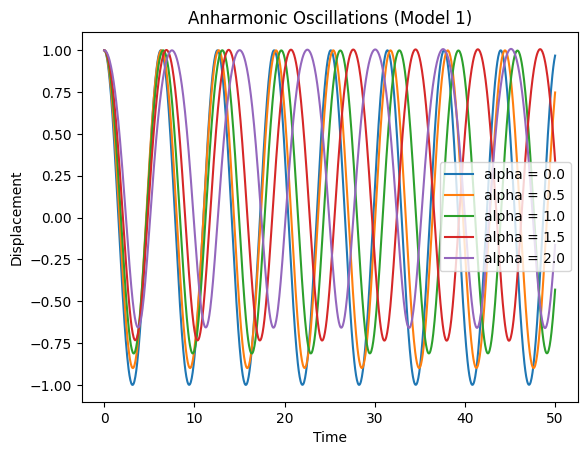

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k = 1.0  # Linear spring constant
alpha_values = np.linspace(0, 2, 5)  # Range of alpha values

# Differential equation for the system (Model 1)
def system(t, y, alpha):
    x, v = y
    dxdt = v
    dvdt = (-k * x + (k * alpha * x**2) / 3) / m
    return [dxdt, dvdt]

# Initial conditions
x0 = 1  # Initial displacement
v0 = 0.0  # Initial velocity

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve the differential equation for different alpha values
for alpha in alpha_values:
    sol = solve_ivp(system, t_span, [x0, v0], t_eval=t_eval, args=(alpha,))
    plt.plot(sol.t, sol.y[0], label=f'alpha = {alpha}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Anharmonic Oscillations (Model 1)')
plt.legend()
plt.show()


## Analytical solution for model 1?

It should be noted that solving such a equation analytically is generally not possible


```python
import sympy as sp

# Define symbols
m, k, alpha, t = sp.symbols('m k alpha t', real=True, positive=True)
x = sp.Function('x')(t)

# Equation of motion (Model 1)
eq = x.diff(t, t) + k * x - (k * alpha * x**2) / 3

# Attempt to solve the differential equation
sol = sp.dsolve(eq, x)

# Print the solution
print(sol)
```


## Check that the solution remains periodic as long as xmax < 2/α in model 1

### You can see that some curves are missing as they are not periodic anymore

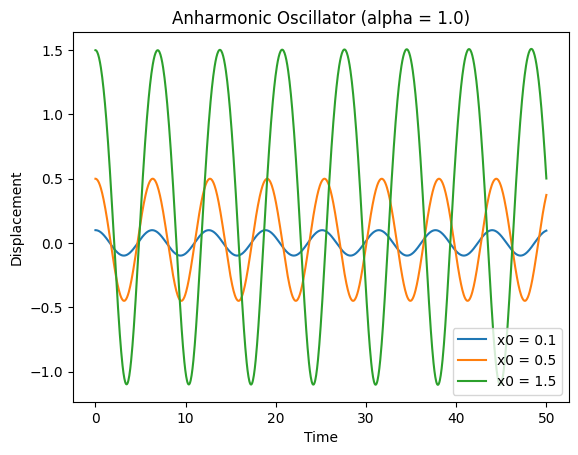

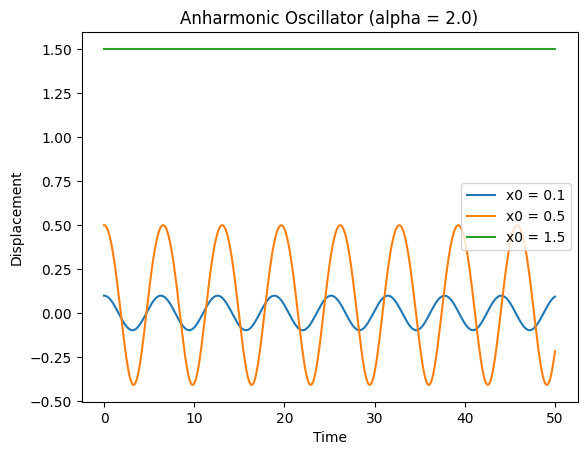

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
k = 1.0  # Linear spring constant
alpha_values = [1.0, 2.0]  # Different values of alpha

# Differential equation for the system (Model 1)
def system(t, y, alpha):
    x, v = y
    dxdt = v
    dvdt = -k * x + (k * alpha * x**2) / 3
    return [dxdt, dvdt]

# Initial conditions with different amplitudes
initial_conditions = [0.1, 0.5, 1.5]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve the differential equation for different alpha values and initial conditions
for alpha in alpha_values:
    plt.figure()
    for x0 in initial_conditions:
        sol = solve_ivp(system, t_span, [x0, 0.0], t_eval=t_eval, args=(alpha,))
        plt.plot(sol.t, sol.y[0], label=f'x0 = {x0}')
    plt.xlabel('Time')
    plt.ylabel('Displacement')
    plt.title(f'Anharmonic Oscillator (alpha = {alpha})')
    plt.legend()
    plt.show()


## Adding the external force

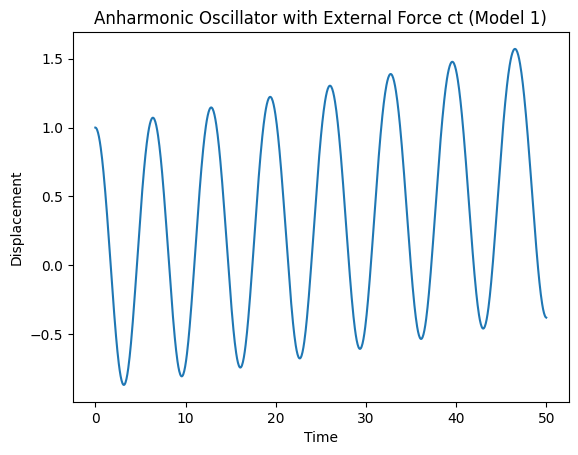

In [81]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k = 1.0  # Linear spring constant
alpha = 0.5  # Anharmonic term

# Differential equation for the system (Model 1 with external force xt)
def system(t, y):
    x, v = y
    F_k = -k * x + (k * alpha * x**2) / 3
    F_ext = 0.01 * t # The Damping force
    dxdt = v
    dvdt = (F_k + F_ext) / m
    return [dxdt, dvdt]

# Initial conditions
x0 = 1  # Initial displacement
v0 = 0.0  # Initial velocity

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve the differential equation
sol = solve_ivp(system, t_span, [x0, v0], t_eval=t_eval)

# Plot the results
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Anharmonic Oscillator with External Force ct (Model 1)')
plt.show()


## Verify that nonharmonic oscillators are nonisochronous, that is, that vibrations with different amplitudes have different periods

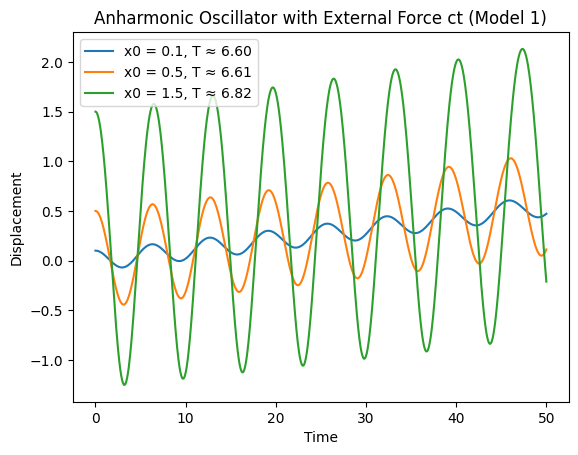

In [80]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k = 1.0  # Linear spring constant
alpha = 0.5  # Anharmonic term

# Differential equation for the system (Model 1 with external force xt)
def system(t, y):
    x, v = y
    F_k = -k * x + (k * alpha * x**2) / 3
    F_ext = 0.01 * t # The Damping force
    dxdt = v
    dvdt = (F_k + F_ext) / m
    return [dxdt, dvdt]

# Initial conditions
v0 = 0.0  # Initial velocity

# Initial conditions with different amplitudes
initial_conditions = [0.1, 0.5, 1.5]

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve the differential equation
sol = solve_ivp(system, t_span, [x0, v0], t_eval=t_eval)

# Plot the results

plt.figure()

for x0 in initial_conditions:
    sol = solve_ivp(system, t_span, [x0, v0], t_eval=t_eval)
    peaks, _ = find_peaks(sol.y[0])  # Find peaks to estimate the period
    period_estimate = np.mean(np.diff(sol.t[peaks]))  # Average time between peaks
    plt.plot(sol.t, sol.y[0], label=f'x0 = {x0}, T ≈ {period_estimate:.2f}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Anharmonic Oscillator with External Force ct (Model 1)')
plt.legend()
plt.show()


## Describe how the shapes of the oscillations change for different α values

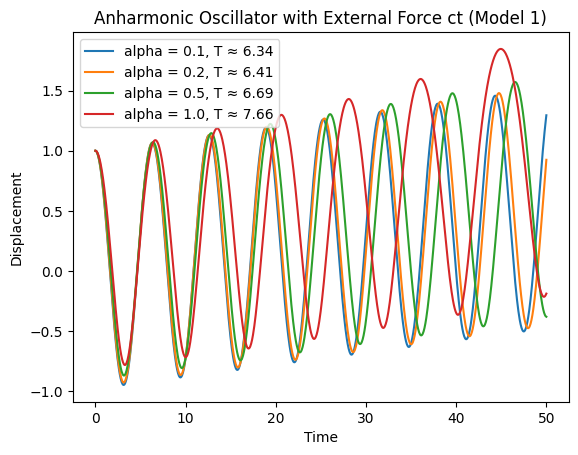

In [79]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k = 1.0  # Linear spring constant

alpha_values = [0.1, 0.2, 0.5, 1.0]

# Differential equation for the system (Model 1 with external force xt)
def system(t, y, alpha):
    x, v = y
    F_k = -k * x + (k * alpha * x**2) / 3
    F_ext = 0.01 * t # The Damping force
    dxdt = v
    dvdt = (F_k + F_ext) / m
    return [dxdt, dvdt]

# Initial conditions
v0 = 0.0  # Initial velocity
x0 = 1.0

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Plot the results

plt.figure()

for alpha in alpha_values:
    sol = solve_ivp(system, t_span, [x0, 0.0], t_eval=t_eval, args=(alpha,))
    peaks, _ = find_peaks(sol.y[0])  # Find peaks to estimate the period
    period_estimate = np.mean(np.diff(sol.t[peaks]))  # Average time between peaks
    plt.plot(sol.t, sol.y[0], label=f'alpha = {alpha}, T ≈ {period_estimate:.2f}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Anharmonic Oscillator with External Force ct (Model 1)')
plt.legend()
plt.show()


## Verify that the motion is oscillatory, though not harmonic, as the energy approaches $ \frac{k}{6\alpha^2} $

## Verify that for oscillations with energy E = $ \frac{k}{6\alpha^2} $, the motion in potential 1 changes from oscillatory to translational.

First to show the relationship between V(x) and k/6α^2

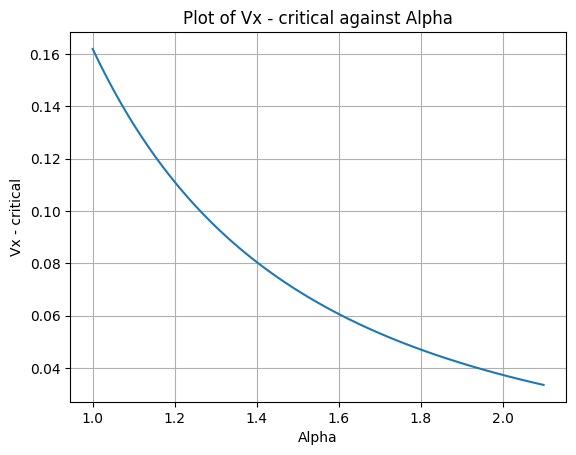

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
x0 = 0.1
k = 1.0

# Define the function
def Vx(alpha):
    return 0.5 * k * (x0**2) - (1/3) * k * alpha * (x0**3)

def crit(alpha):
    return k/(6*alpha**2)

# Define the range of alpha
alpha_values = np.arange(1, 2.11, 0.01)

# Compute the corresponding Vx values
Vx_values = np.array([Vx(alpha) for alpha in alpha_values])
crit_values = np.array([crit(alpha) for alpha in alpha_values])

y_values = np.subtract(crit_values, Vx_values)

# Plot the graph

plt.plot(alpha_values, y_values)
plt.xlabel('Alpha')
plt.ylabel('Vx - critical')
plt.title('Plot of Vx - critical against Alpha')
plt.grid(True)
plt.show()


Below shows how the curve changes from oscillatory to translational as the two values approaches

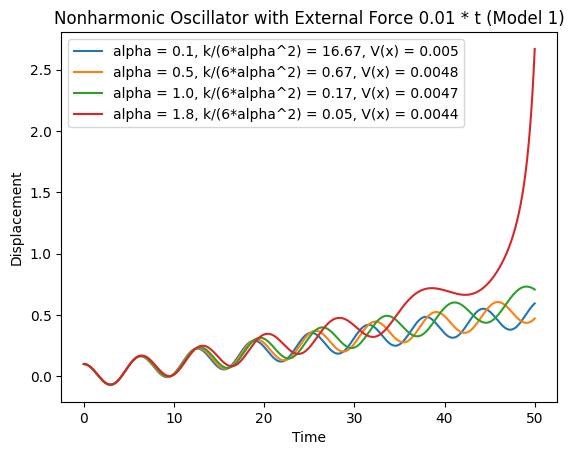

In [78]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k = 1.0  # Linear spring constant
alpha_values = [0.1, 0.5, 1.0, 1.8]  # Different values of alpha

# Differential equation for the system (Model 1 with external force 0.01 * t)
def system(t, y, alpha):
    x, v = y
    F_k = -k * x + (k * alpha * x**2) / 3
    F_ext = 0.01 * t  # External force
    dxdt = v
    dvdt = (F_k + F_ext) / m
    return [dxdt, dvdt]

# Initial conditions
x0 = 0.1  # Initial displacement
v0 = 0.0  # Initial velocity

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Solve the differential equation for different alpha values
for alpha in alpha_values:
    sol = solve_ivp(system, t_span, [x0, v0], t_eval=t_eval, args=(alpha,))
    plt.plot(sol.t, sol.y[0], label=f'alpha = {alpha}, k/(6*alpha^2) = {k/(6*alpha**2):.2f}, V(x) = {round(0.5*k*(x0**2) - 1/3 * k * alpha * (x0**3), 4)}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Nonharmonic Oscillator with External Force 0.01 * t (Model 1)')
plt.legend()
plt.show()


## Algebraic analysis for the critical value $ \frac{k}{6\alpha^2} $

For Model 1, the potential energy is given by:

$ V(x) = \frac{1}{2} kx^2 - \frac{1}{3} k\alpha x^3 $

We can analyze the behavior of the system as the energy approaches $ \frac{k}{6\alpha^2} $ by examining the potential energy and the corresponding equations of motion.

1. **Find the Extrema of the Potential Energy**: To understand the behavior of the system, we need to find the extrema of the potential energy. We can do this by taking the derivative of $ V(x) $ with respect to $ x $ and setting it equal to zero:

   $ \frac{dV}{dx} = kx - k\alpha x^2 = 0 $

   Solving this equation, we find:

   $ x = 0, \quad x = \frac{1}{\alpha} $

2. **Analyze the Behavior at the Extrema**: The behavior of the system depends on the total energy $ E $ relative to the potential energy at these extrema:

   - If $ E < V(0) $, the motion is bounded and oscillatory.
   - If $ E = V(0) $, the motion is at the separatrix, and a single oscillation takes an infinite amount of time.
   - If $ E > V(0) $, the motion is unbounded and translational.

3. **Evaluate the Potential Energy at the Extrema**: We can find the value of the potential energy at the extrema:

   $ V\left(\frac{1}{\alpha}\right) = \frac{k}{6\alpha^2} $

4. **Conclusion**: As the total energy $ E $ approaches $ \frac{k}{6\alpha^2} $, the motion changes from oscillatory to translational. This transition occurs at the separatrix, where the energy is equal to the maximum of the potential energy.

The algebraic analysis shows that the specific value $ \frac{k}{6\alpha^2} $ represents a critical energy level for the system. Below this value, the motion is oscillatory, and above this value, the motion is translational. The transition at this energy level is a characteristic feature of non-linear oscillators and represents a fundamental change in the nature of the motion.

# Model 2



The potential energy is given by:

$ V(x) = \frac{1}{p} kx^p $

Considering p=6

### Model 2 in the real world

Model 2, as described earlier, represents a non-linear oscillator with a potential energy given by:

$ V(x) = \frac{1}{p} kx^p $

where $ p $ is an even integer. The corresponding force is:

$ F_k(x) = -\frac{dV}{dx} = -kx^{p-1} $

This model introduces a power-law relationship between the force and displacement, which can represent various physical systems where the restoring force is not directly proportional to the displacement.

Here are some real-world scenarios where Model 2 might be applicable:

1. **Non-Linear Mechanical Systems**: In some mechanical systems, the restoring force may follow a power-law relationship with displacement, especially when dealing with materials or components that have non-linear elastic properties. This could include certain polymers, foams, or other complex materials.

2. **Biological Systems**: Some biological structures, such as cell membranes or biological tissues, may exhibit non-linear mechanical behavior that could be approximated by a power-law relationship between force and displacement.

3. **Quantum Systems**: In quantum mechanics, certain potentials may be modeled using power-law relationships, especially when considering interactions that are not well-approximated by simple harmonic potentials.

4. **Fluid Dynamics**: In certain fluid dynamics problems, non-linear relationships between variables may arise, leading to power-law behavior. This could include turbulence or other complex flow phenomena.

5. **Electrical Circuits with Non-Linear Components**: In electrical engineering, components like diodes or transistors may exhibit non-linear current-voltage characteristics that could be modeled using a power-law relationship.

6. **Geophysical Phenomena**: Certain geophysical processes, such as the deformation of Earth's crust or the flow of glaciers, may exhibit non-linear behavior that could be approximated using a power-law model.

The specific value of $ p $ and the constant $ k $ would depend on the physical characteristics of the system being modeled. They would typically be determined based on empirical data, experimental observations, or theoretical considerations related to the particular system.

Model 2 represents a more generalized form of non-linear behavior compared to Model 1 and can be used to describe a wide variety of systems where the relationship between force and displacement is not linear. It provides a flexible framework for modeling complex phenomena across various scientific and engineering disciplines.

### Model 2 as k varies

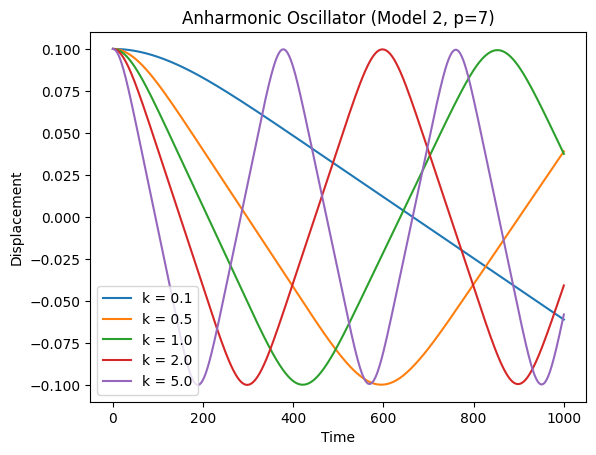

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k_values = [0.1, 0.5, 1.0, 2.0, 5.0]  # Different values of k

# Differential equation for the system (Model 2, p=6)
def system(t, y, k):
    x, v = y
    dxdt = v
    dvdt = -k * x**5 / m
    return [dxdt, dvdt]

# Initial conditions
x0 = 0.1  # Initial displacement
v0 = 0.0  # Initial velocity

# Time span
t_span = (0, 1000)
t_eval = np.linspace(*t_span, 1000)

# Solve the differential equation for different k values
for k in k_values:
    sol = solve_ivp(system, t_span, [x0, v0], t_eval=t_eval, args=(k,))
    plt.plot(sol.t, sol.y[0], label=f'k = {k}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Anharmonic Oscillator (Model 2, p=7)')
plt.legend()
plt.show()


### Describe how the shapes of the oscillations change for different p values

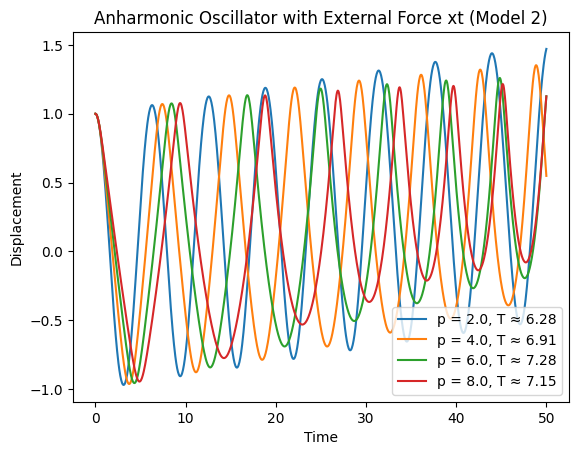

In [44]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1.0  # Mass
k = 1.0  # Linear spring constant

p_values = [2.0, 4.0, 6.0, 8.0]

# Differential equation for the system (Model 1 with external force xt)
def system(t, y, p):
    x, v = y
    F_k = -k * x**(p - 1)
    F_ext = 0.01 * t # The External force
    dxdt = v
    dvdt = (F_k + F_ext) / m
    return [dxdt, dvdt]

# Initial conditions
v0 = 0.0  # Initial velocity
x0 = 1.0

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 1000)

# Plot the results

plt.figure()

for p in p_values:
    sol = solve_ivp(system, t_span, [x0, v0], t_eval=t_eval, args=(p,))
    peaks, _ = find_peaks(sol.y[0])  # Find peaks to estimate the period
    period_estimate = np.mean(np.diff(sol.t[peaks]))  # Average time between peaks
    plt.plot(sol.t, sol.y[0], label=f'p = {p}, T ≈ {period_estimate:.2f}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Anharmonic Oscillator with External Force xt (Model 2)')
plt.legend()
plt.show()


## what values of p and x will the potential begin to look like a square well

In Model 2, the potential is given by:

$ V(x) = \frac{1}{p} kx^p $

A square well potential is characterized by steep walls and a flat bottom, resembling a rectangular shape. To make the potential look like a square well, we would want the potential to increase sharply as $ x $ moves away from 0.

As the value of $ p $ increases, the potential $ V(x) $ will become steeper for $ x > 0 $ and $ x < 0 $, especially near the origin. This will make the potential look more like a square well.

Here's a qualitative analysis:

- For **even values of $ p $**, the potential will be symmetric around $ x = 0 $, and as $ p $ increases, the walls of the potential will become steeper.
- For **odd values of $ p $**, the potential will be anti-symmetric around $ x = 0 $, and increasing $ p $ will also make the walls steeper, but the potential will not resemble a traditional square well due to the anti-symmetry.

So, to make the potential look like a square well, you would typically choose a large even value of $ p $. The exact value that makes the potential resemble a square well will depend on the specific shape and steepness you have in mind.

Here's a code snippet to visualize the potential for different values of $ p $:

```python
import numpy as np
import matplotlib.pyplot as plt

k = 1.0  # Spring constant
p_values = [2, 4, 6, 8, 10]  # Different values of p
x = np.linspace(-2, 2, 1000)

for p in p_values:
    V = (k * x**p) / p
    plt.plot(x, V, label=f'p = {p}')

plt.xlabel('Position (x)')
plt.ylabel('Potential (V)')
plt.title('Potential for Different Values of p')
plt.legend()
plt.show()
```

This code will plot the potential for different even values of $ p $, and you can see how the shape approaches that of a square well as $ p $ increases. Experimenting with different values of $ p $ and $ k $ will allow you to find the specific parameters that best match the square well shape you have in mind.

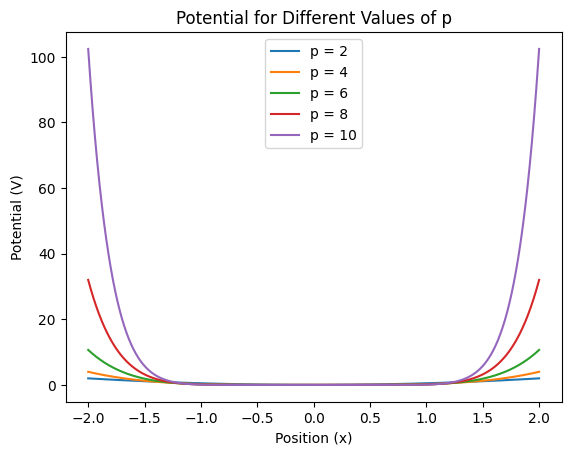

In [29]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.0  # Spring constant
p_values = [2, 4, 6, 8, 10]  # Different values of p
x = np.linspace(-2, 2, 1000)

for p in p_values:
    V = (k * x**p) / p
    plt.plot(x, V, label=f'p = {p}')

plt.xlabel('Position (x)')
plt.ylabel('Potential (V)')
plt.title('Potential for Different Values of p')
plt.legend()
plt.show()


## Does Model 2 has separatrix?

For Model 2, the potential energy is given by:

$ V(x) = \frac{1}{p} kx^p $

where $ p $ is an even integer. The corresponding force is:

$ F_k(x) = -\frac{dV}{dx} = -kx^{p-1} $

We can analyze the behavior of the system by examining the potential energy and the corresponding equations of motion.

1. **Find the Extrema of the Potential Energy**: Since the potential energy is a monomial, there is only one extremum at $ x = 0 $:

   $ V(0) = 0 $

2. **Analyze the Behavior at the Extremum**: The behavior of the system depends on the total energy $ E $ relative to the potential energy at this extremum:

   - If $ E < V(0) = 0 $, the motion is not physically meaningful since the energy cannot be negative.
   - If $ E = V(0) = 0 $, the particle is at rest at the equilibrium position.
   - If $ E > V(0) = 0 $, the motion is unbounded, and the particle will move away from the equilibrium position.

3. **Evaluate the Potential Energy for Different Values of $ x $**: Since the potential energy is a monomial, it will increase without bound as $ x $ moves away from 0. There is no specific value of the energy that represents a transition from oscillatory to translational motion, as the system does not exhibit bounded oscillatory motion for any positive energy.

4. **Conclusion**: Model 2 does not exhibit oscillatory behavior for any positive energy. The potential energy increases without bound as $ x $ moves away from 0, and the motion is always unbounded and translational for positive energy.

The algebraic analysis of Model 2 shows that it represents a fundamentally different type of system compared to Model 1. While Model 1 exhibits a transition from oscillatory to translational motion at a specific energy level, Model 2 does not exhibit oscillatory behavior for any positive energy. The nature of the motion in Model 2 is determined by the power-law relationship between force and displacement, as described by the potential energy function $ V(x) = \frac{1}{p} kx^p $.